In [4]:
## step 1 : import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [6]:
## load the dataset
gold_data = pd.read_csv('gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [7]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.shape

(2290, 6)

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# step :2 cleaning the data
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
gold_data.drop('Date',axis=1,inplace=True)

In [16]:
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

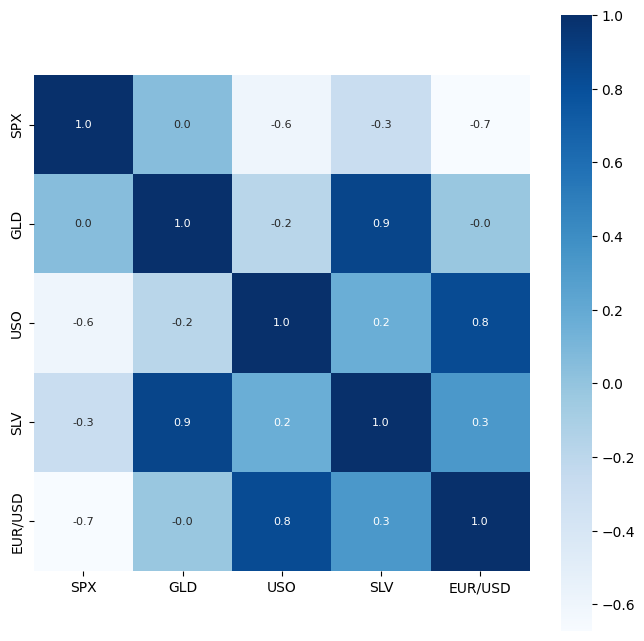

In [18]:
# constructing a heatmap to understand the correlatiom between the columns
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

In [19]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\itsme\AppData\Local\Temp\ipykernel_25292\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

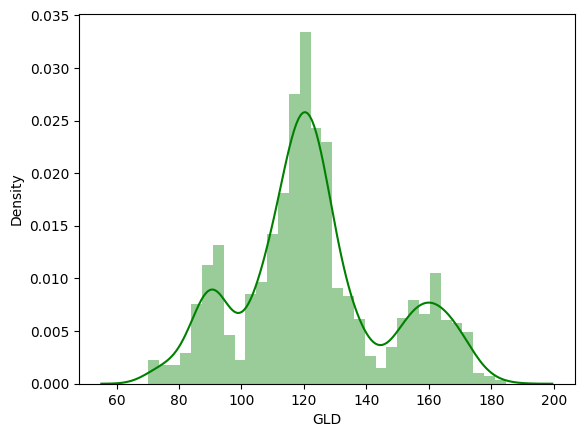

In [22]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [25]:
# step3: Splitting the Features and Targets
X= gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [26]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=2)

In [27]:
 X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [28]:
 X_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [29]:
Y_train

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64

In [30]:
Y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

# step 4: train the model using random forest regressor


In [31]:
regressor = RandomForestRegressor(n_estimators=100)

In [32]:
# training the model
regressor.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
test_data_prediction 

array([168.50759905,  81.63160001, 115.79340064, 127.66460103,
       120.81100137, 154.73159815, 150.22029863, 126.01750065,
       117.60869863, 125.9988009 , 116.75340138, 172.36140028,
       141.70989828, 167.93059856, 115.15009973, 117.41480031,
       138.18880374, 170.21270117, 159.39790308, 162.74039903,
       155.03750007, 124.90440014, 176.2667994 , 157.3084029 ,
       125.14880038,  93.76719956,  78.25459988, 120.45359986,
       119.10329938, 167.5549995 ,  88.08320037, 125.18490044,
        91.1267009 , 117.78280031, 121.10749905, 137.65050082,
       115.43350144, 115.25380044, 147.09189956, 107.15310093,
       104.17510227,  87.35119783, 126.48700063, 117.86150035,
       153.79529926, 119.71300017, 108.29130016, 108.0908981 ,
        93.21730086, 127.1370975 ,  74.78570086, 113.66349921,
       121.16090019, 111.06469954, 118.81529897, 120.77599925,
       159.86919948, 168.45760115, 147.29289733,  85.74749869,
        94.48850045,  86.73079865,  90.60869995, 118.92

In [35]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894106614784874


# train the model using linear regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr_model = LinearRegression()
lr_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
# training the model
lr_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
# prediction on Test Data
test_data_prediction = lr_model.predict(X_test)
test_data_prediction 

array([159.45290968,  81.50858067, 113.4868037 , 128.55153817,
       126.20403783, 141.31818338, 165.49416492, 124.44197659,
       113.95389904, 122.9965895 , 113.95492464, 174.89529849,
       132.66890174, 159.24793304, 118.8791679 , 122.14315717,
       150.37153054, 161.27175405, 152.2792036 , 162.19946709,
       145.88372183, 118.07669395, 180.21729122, 178.13331554,
       123.51701986,  98.82914322,  76.63486248, 119.38435511,
       113.85027665, 159.25706609,  93.76037617, 120.05334649,
        88.61086583, 114.28801659, 112.77954274, 144.19518102,
       118.78252489, 115.87334354, 144.06409553, 113.81864246,
       100.49676727,  89.42842238, 120.36720699, 110.47635305,
       146.4894628 , 119.30321261, 110.99311348, 111.3386287 ,
        96.48139076, 123.40842816,  79.51413425, 115.36111603,
       121.78896764, 114.55367722, 120.9074622 , 117.10612464,
       152.31198525, 182.7735091 , 196.73570503,  91.06670951,
       101.92097594,  87.48443506,  94.33158785, 119.17

In [42]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8657886565869237


# conclusion : we trained using linear regression and random forest , based on r squared error random forest algorithm is performing better compared to linear regression

In [43]:
Y_test = list(Y_test)

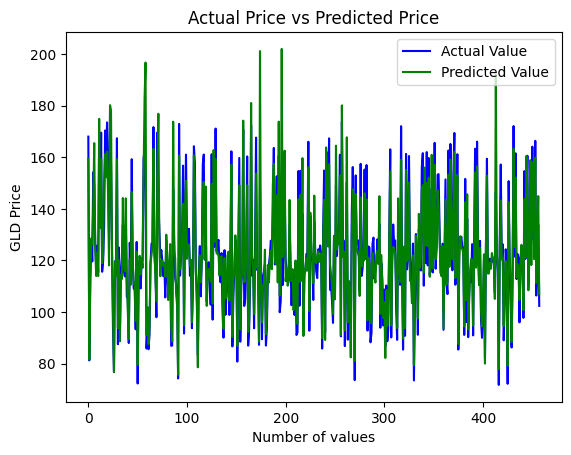

In [44]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()